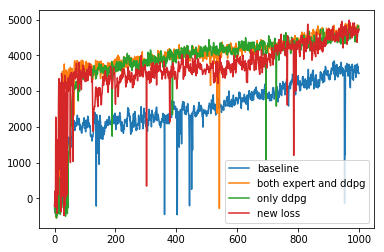

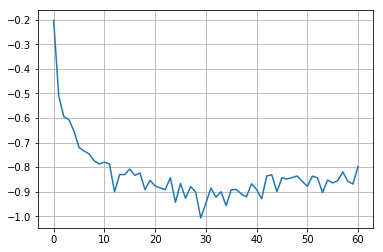

In [382]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

log_file0 = './logs/HalfCheetah-v1/train_newer_expert_data/gym_eval.monitor.csv'
log_file1 = './logs/HalfCheetah-v1/newer_expert_data_with_both_expert_and_ddpg_actor_loss/gym_eval.monitor.csv'
log_file2 = './logs/HalfCheetah-v1/newer_expert_data_with_only_ddpg_actor_loss/gym_eval.monitor.csv'
#log_file3 = './logs/HalfCheetah-v1/newer_expert_data_with_only_expert_actor_loss/gym_eval.monitor.csv'
log_file3 = './logs/HalfCheetah-v1/2017-12-27-23-28-50-405643/gym_eval.monitor.csv'

data0 = pandas.read_csv(log_file0, index_col=None, comment='#')
data0 = data0['r']
data1 = pandas.read_csv(log_file1, index_col=None, comment='#')
data1 = data1['r']
data2 = pandas.read_csv(log_file2, index_col=None, comment='#')
data2 = data2['r']
data3 = pandas.read_csv(log_file3, index_col=None, comment='#')
data3 = data3['r']
plt.plot(data0)
plt.plot(data1)
plt.plot(data2)
plt.plot(data3)
plt.legend(['baseline', 'both expert and ddpg', 'only ddpg', 'new loss'])#, 'only expert'])
plt.show()


log_file0 = './logs/HalfCheetah-v1/2017-12-27-23-28-50-405643/progress.csv'

data0 = pandas.read_csv(log_file0, index_col=None, comment='#')
#print(data0)
lc = data0['train/dist'].values
#la = data0['train/loss_actor'].values
#print(lc)
plt.plot(lc)
#plt.plot(la)
#plt.legend(['critic', 'actor'])#, 'only expert'])
plt.grid()
plt.show()

In [2]:
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

def smooth(n,x,y):
    sm = np.zeros(10000)
    k=0
    f = lambda x,l,h: x <= h and x >= l
    sm_x = np.arange(1, np.max(x)-n+1, 100)
    for i in sm_x:
        idx = [f(var,i,i+n) for var in x]
        sm[k] = np.dot(idx,y)/np.sum(idx)
        k=k+1
    sm = sm[:k]
    sm_x = sm_x[:k] + np.floor(n/2)
    return sm, sm_x



env_ids = ['HalfCheetah-v1', 'Hopper-v1', 'Walker2d-v1']#, 'HumanoidStandup-v1']
ave_rewards = [4721.3959546, 1982.82768185, 3062.83132533]

expertfiles = [os.path.join('./logs', var, 'expert/gym_eval.monitor.csv') for var in env_ids]
baselinefiles = [os.path.join('./logs', var, 'baseline/gym_eval.monitor.csv') for var in env_ids]

expertdata = [pandas.read_csv(file, index_col=None, comment='#') for file in expertfiles]
baselinedata = [pandas.read_csv(file, index_col=None, comment='#') for file in baselinefiles]

x_expert = [np.cumsum(var['l'].values) for var in expertdata]
x_baseline = [np.cumsum(var['l'].values) for var in baselinedata]

r_expert = [var['r'] for var in expertdata]
r_baseline = [var['r'] for var in baselinedata]


r_baseline_smooth = [var['r'] for var in baselinedata]
'''
for i in range(len(x_expert)):
    if i==0:
        sm_n = 10000
    else:
        sm_n = 30000
    r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert[i], r_expert[i])
    r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline[i], r_baseline[i])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x_baseline[i]/1e5*2, r_baseline[i], 'C0', alpha=0.3, label='')
    ax.plot(x_expert[i]/1e5*2, r_expert[i], 'C3', alpha=0.3, label='')
    ax.plot(x_baseline_smooth/1e5*2, r_baseline_smooth, 'C0', label='DDPG')
    ax.plot(x_expert_smooth/1e5*2, r_expert_smooth, 'C3', label='DDPG+Pretrain')
    ax.vlines(0.6, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='')
    ax.hlines(ave_rewards[i], 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='')
    plt.xlabel('Simulation Steps /$10^5$')
    plt.ylabel('Reward')
    
    #plt.xticks([30000],['End of Pretrain'])
    
    plt.legend()
    plt.show()
'''
pdf = PdfPages('./DDPG_results.pdf')
fig = plt.figure(figsize=(6.4*3,4.0))

sm_n = 10000
r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert[0], r_expert[0])
r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline[0], r_baseline[0])
ax = fig.add_subplot(131)
ax.plot(x_baseline[0]/1e5, r_baseline[0], 'C0', alpha=0.3, label='')
ax.plot(x_expert[0]/1e5, r_expert[0], 'C3', alpha=0.3, label='')
ax.plot(x_baseline_smooth/1e5, r_baseline_smooth, 'C0', label='DDPG')
ax.plot(x_expert_smooth/1e5, r_expert_smooth, 'C3', label='DDPG+Pretrain')
ax.vlines(0.3, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='')
ax.hlines(ave_rewards[0], 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='')
plt.xlabel('Training Steps /$10^5$')
plt.ylabel('Reward')
plt.legend()

##################################################
sm_n = 30000
r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert[1], r_expert[1])
r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline[1], r_baseline[1])
ax = fig.add_subplot(132)
ax.plot(x_baseline[1]/1e5, r_baseline[1], 'C0', alpha=0.3, label='')
ax.plot(x_expert[1]/1e5, r_expert[1], 'C3', alpha=0.3, label='')
ax.plot(x_baseline_smooth/1e5, r_baseline_smooth, 'C0', label='DDPG')
ax.plot(x_expert_smooth/1e5, r_expert_smooth, 'C3', label='DDPG+Pretrain')
ax.vlines(0.3, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='End of Pretrain')
ax.hlines(ave_rewards[1], 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='Average Reward of ED')
plt.xlabel('Training Steps /$10^5$')

#####################################################
r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert[2], r_expert[2])
r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline[2], r_baseline[2])
ax = fig.add_subplot(133)
ax.plot(x_baseline[2]/1e5, r_baseline[2], 'C0', alpha=0.3, label='')
ax.plot(x_expert[2]/1e5, r_expert[2], 'C3', alpha=0.3, label='')
ax.plot(x_baseline_smooth/1e5, r_baseline_smooth, 'C0', label='DDPG')
ax.plot(x_expert_smooth/1e5, r_expert_smooth, 'C3', label='DDPG+Pretrain')
ax.vlines(0.3, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='End of Pretrain')
ax.hlines(ave_rewards[2], 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='Average Reward of ED')


plt.xlabel('Training Steps /$10^5$')


#plt.xticks([30000],['End of Pretrain'])

plt.show()
pdf.savefig(fig)
plt.close()
pdf.close()

KeyboardInterrupt: 

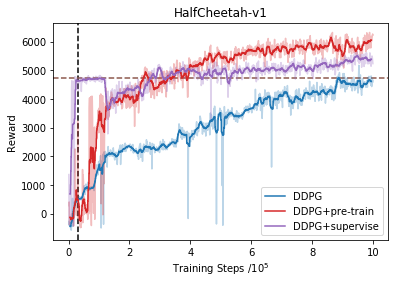

In [15]:
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

def smooth(n,x,y):
    sm = np.zeros(10000)
    k=0
    f = lambda x,l,h: x <= h and x >= l
    sm_x = np.arange(1, np.max(x)-n+1, 100)
    for i in sm_x:
        idx = [f(var,i,i+n) for var in x]
        sm[k] = np.dot(idx,y)/np.sum(idx)
        k=k+1
    sm = sm[:k]
    sm_x = sm_x[:k] + np.floor(n/2)
    return sm, sm_x



env_ids = 'HalfCheetah-v1'#, 'Hopper-v1', 'Walker2d-v1']#, 'HumanoidStandup-v1']
ave_rewards = 4721.3959546#, 1982.82768185, 3062.83132533]

expertfiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'expert/gym_eval.monitor.csv')
baselinefiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline/gym_eval.monitor.csv')
supervisedfiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/data/supplementary/logs',env_ids, 'supervise/gym_eval.monitor.csv')

superviseddata = pandas.read_csv(supervisedfiles, index_col=None, comment='#')
expertdata = pandas.read_csv(expertfiles, index_col=None, comment='#')
baselinedata = pandas.read_csv(baselinefiles, index_col=None, comment='#')

x_supervised = np.cumsum(superviseddata['l'].values)
x_expert = np.cumsum(expertdata['l'].values)
x_baseline = np.cumsum(baselinedata['l'].values)

r_supervised = superviseddata['r']
r_expert = expertdata['r']
r_baseline = baselinedata['r']

#r_baseline_smooth = baselinedata['r']

pdf = PdfPages('./test.pdf')
fig = plt.figure()#figsize=(6.4*3,4.0))

sm_n = 10000
r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert, r_expert)
r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline, r_baseline)
r_supervised_smooth, x_supervised_smooth = smooth(sm_n, x_supervised, r_supervised)

ax = fig.add_subplot(111)
ax.plot(x_baseline/1e5, r_baseline, 'C0', alpha=0.3, label='')
ax.plot(x_expert/1e5, r_expert, 'C3', alpha=0.3, label='')
ax.plot(x_supervised/1e5, r_supervised, 'C4', alpha=0.3, label='')

ax.plot(x_baseline_smooth/1e5, r_baseline_smooth, 'C0', label='DDPG')
ax.plot(x_expert_smooth/1e5, r_expert_smooth, 'C3', label='DDPG+pre-train')
ax.plot(x_supervised_smooth/1e5, r_supervised_smooth, 'C4', label='DDPG+supervise')
ax.set_title(env_ids)
ax.vlines(0.3, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='')
ax.hlines(ave_rewards, 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='')
plt.xlabel('Training Steps /$10^5$')
plt.ylabel('Reward')
plt.legend()

plt.show()
pdf.savefig(fig)
plt.close()
pdf.close()

In [108]:
env.close()

In [131]:
import pickle
import os
env_ids = ['HalfCheetah-v1', 'Hopper-v1', 'Walker2d-v1']
expert_dirs = [os.path.join('./expert', var) + '/expert.pkl' for var in env_ids]
for i in range(len(envs)):
    expert_file = open(expert_dirs[i], 'rb')
    expert_data = pickle.load(expert_file)
    expert_file.close()
    n = 0
    r = 0
    for episode_sample in expert_data:
        for step_sample in episode_sample:
            r += step_sample[2]
        n +=1.
            
    ave_r = r/n
    print(ave_r)


4721.3959546
1982.82768185
3062.83132533
